In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Importing Data :

In [2]:
test = pd.read_csv("data/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train = pd.read_csv("data/train.csv")
del train['Cabin']
del train['Embarked']
del train['Ticket']
del train['PassengerId']
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


## Data Cleaning:

In [4]:
rowsTest  = len(test.axes[0])
colTest = len(test.axes[1])
print("The number of rows and columns in test data is as follow: ",rowsTest,colTest)
print("Pclass :",test.dtypes['Pclass'],"Null values :",test['Pclass'].isnull().sum())
print("Name :",test.dtypes['Name'],"Null values :",test['Name'].isnull().sum())
print("Sex :",test.dtypes['Sex'],"Null values :",test['Sex'].isnull().sum())
print("Age :",test.dtypes['Age'],"Null values :",test['Age'].isnull().sum())
print("SibSp :",test.dtypes['SibSp'],"Null values :",test['SibSp'].isnull().sum())
print("Parch :",test.dtypes['Parch'],"Null values :",test['Parch'].isnull().sum())
print("Ticket :",test.dtypes['Ticket'],"Null values :",test['Ticket'].isnull().sum())
print("Fare :",test.dtypes['Fare'],"Null values :",test['Fare'].isnull().sum())
print("Cabin :",test.dtypes['Cabin'],"Null values :",test['Cabin'].isnull().sum())
print("Embardked :",test.dtypes['Embarked'],"Null values :",test['Embarked'].isnull().sum())

The number of rows and columns in test data is as follow:  418 11
Pclass : int64 Null values : 0
Name : object Null values : 0
Sex : object Null values : 0
Age : float64 Null values : 86
SibSp : int64 Null values : 0
Parch : int64 Null values : 0
Ticket : object Null values : 0
Fare : float64 Null values : 1
Cabin : object Null values : 327
Embardked : object Null values : 0


In [5]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
rowsTest  = len(train.axes[0])
colTest = len(train.axes[1])
print("Survived :",train.dtypes['Survived'],"Null values :",train['Survived'].isnull().sum())
print("Pclass :",train.dtypes['Pclass'],"Null values :",train['Pclass'].isnull().sum())
print("Name :",train.dtypes['Name'],"Null values :",train['Name'].isnull().sum())
print("Sex :",train.dtypes['Sex'],"Null values :",train['Sex'].isnull().sum())
print("Age :",train.dtypes['Age'],"Null values :",train['Age'].isnull().sum())
print("SibSp :",train.dtypes['SibSp'],"Null values :",train['SibSp'].isnull().sum())
print("Parch :",train.dtypes['Parch'],"Null values :",train['Parch'].isnull().sum())
print("Fare :",train.dtypes['Fare'],"Null values :",train['Fare'].isnull().sum())


Survived : int64 Null values : 0
Pclass : int64 Null values : 0
Name : object Null values : 0
Sex : object Null values : 0
Age : float64 Null values : 177
SibSp : int64 Null values : 0
Parch : int64 Null values : 0
Fare : float64 Null values : 0


In [7]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

## Exploratory Analysis (On training set):

### Show how many passengers were male and female and plot using matplotlib. On the same plot depict the people who survived and who died. Make accurate axis and legend. Save the plot in a png file. 

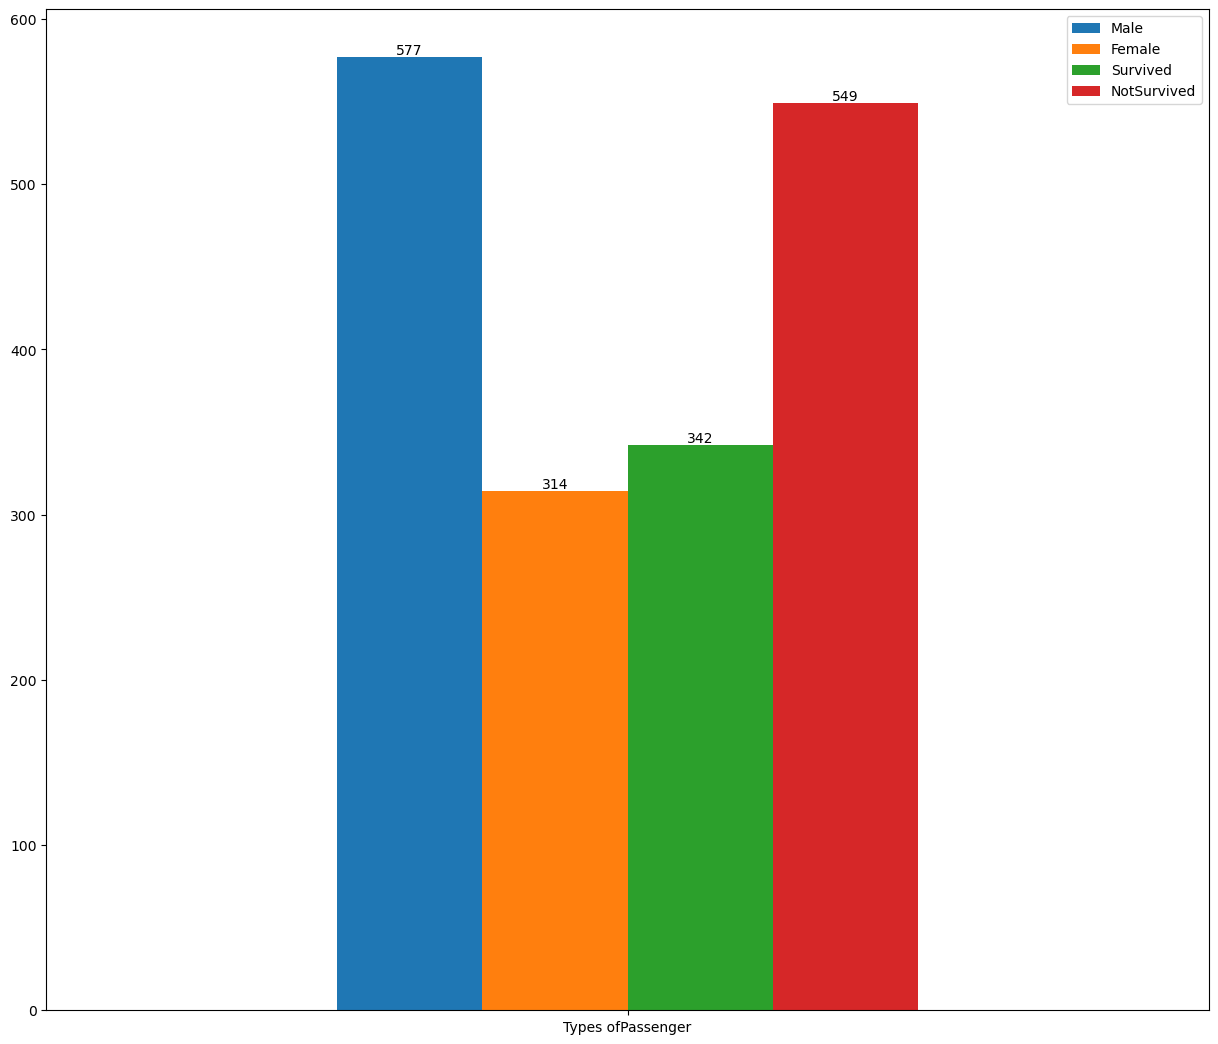

In [8]:
male=len(train.query("Sex == 'male'"))
female=len(train.query("Sex != 'male'"))
Survived=len(train.query("Survived == 1"))
notSurvived=len(train.query("Survived == 0"))
df = pd.DataFrame({'Male': male, 'Female': female,'Survived':Survived,'NotSurvived':notSurvived},index=['Types ofPassenger'])
ax = df.plot.bar(figsize=(15,13),rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig("Q1.png")

### Show the histogram of the count of passengers who died (according to their age). Age ranges should be <10, 10 to <20, 20 to <30 and so on

### How many minor children died and how many of them survived (<16 years). Create a separate plot for the passengers who survived.

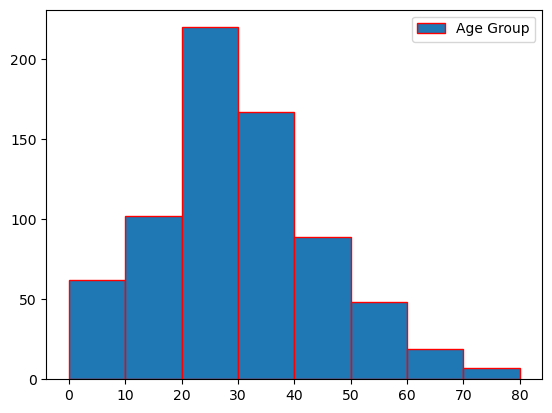

100 55 45


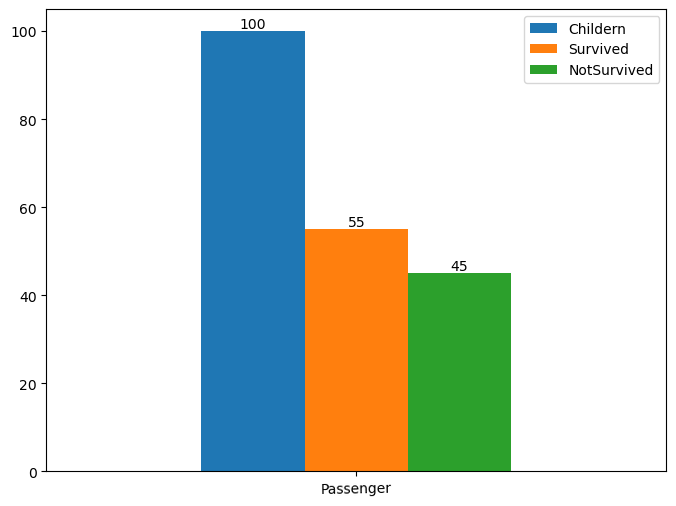

In [9]:
age=train['Age']
plt.hist(age,bins=[0,10,20,30,40,50,60,70,80],edgecolor="red",label='Age Group')
plt.legend()
plt.xlabel="Age Group"
plt.ylabel="Number of Passengar"
plt.savefig("Q2a.png")
plt.show()

childAge=pd.DataFrame(train.query("Age <=16"))
child=len(childAge)
Survived=len(childAge.query("Survived == 1"))
notSurvived=len(childAge.query("Survived == 0 "))
print(child,Survived,notSurvived)
df = pd.DataFrame({'Childern': child, 'Survived': Survived,'NotSurvived':notSurvived},index=['Passenger'])
ax = df.plot.bar(figsize=(8,6),rot=1)

for container in ax.containers:
    ax.bar_label(container)
plt.savefig("Q2b.png")

### Show the distribution on the count of passengers who died (according to the fare they paid). Choose fare ranges such that the mean lies in the middle range. 

### Give the percentage of passengers who survived as had paid more than 100.Justify if there was any bias in the rescue operation towards the rich (Yes/No/not enough evidence)

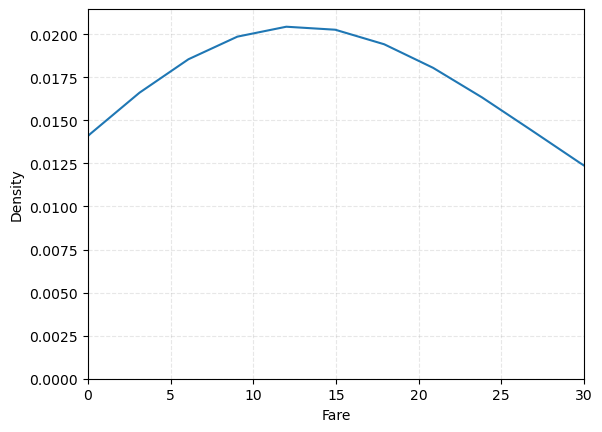

In [10]:
sns.kdeplot(data=train['Fare'])
plt.xlim([0,30])
# plt.xlabel("Fare", size=12)    
# plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()
plt.show()

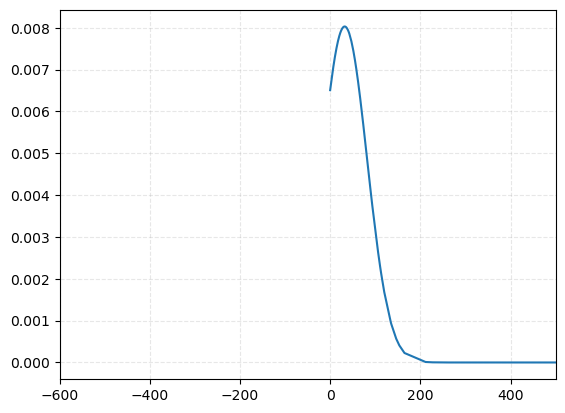

In [11]:
df_mean = np.mean(train["Fare"])
df_std = np.std(train["Fare"])
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(train["Fare"].sort_values(), df_mean, df_std)
# print(pdf)
plt.plot(train['Fare'].sort_values(),pdf)
plt.xlim([-600,500])
# plt.xlabel("Fare", size=12)    
# plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()
plt.show()

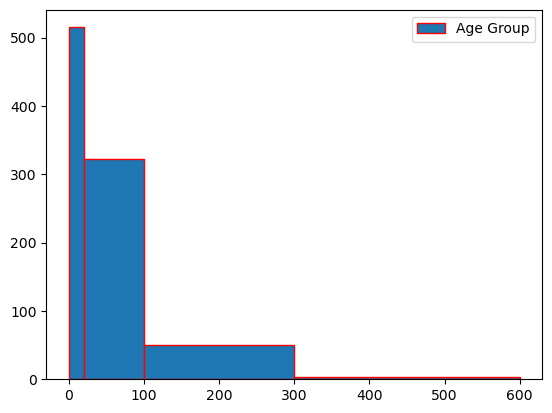

In [12]:
train['Fare'].mean()
fare=train['Fare']
plt.hist(fare,bins=[0,20,100,300,600],edgecolor="red",label='Age Group')
plt.legend()
plt.xlabel="Age Group"
plt.ylabel="Number of Passengar"
plt.savefig("Q2a.png")
plt.show()

<AxesSubplot:ylabel='Frequency'>

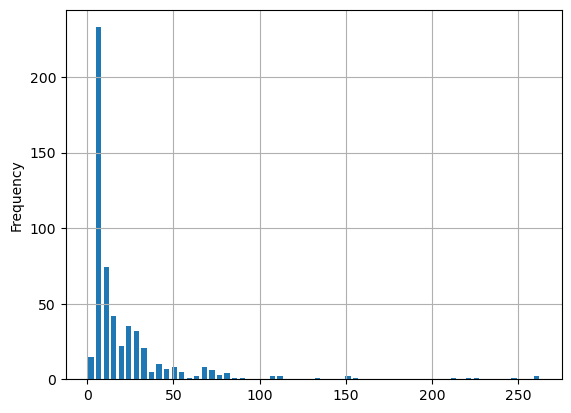

In [13]:
pd = train.query("Survived == 0")
pd=pd[['Fare','Survived']].copy()
pd
pd['Fare'].plot.hist(grid=True, bins=60, rwidth=0.7)

In [14]:
paidMore=train.query('Fare>=100')
paidMoreAndSurvived=train.query('Survived ==1 and Fare>=100')
percentage= (len(paidMoreAndSurvived)/len(paidMore))*100
print(percentage," % of the passenger were survived, who paid more than $100")
print("As we can see from the percentage of rich passenger saved, it was biased! ")

73.58490566037736  % of the passenger were survived, who paid more than $100
As we can see from the percentage of rich passenger saved, it was biased! 


### Plot graphs showing correlation between different pairs of attributes. Infer if there is any significant correlation between survivors and any specific feature

In [15]:
relation1S = train.query('Survived == 1 and Pclass==1')
relation1NS = train.query('Survived != 1 and Pclass==1')
Pclass1 = train.query('Pclass==1')
percent1 = (len(relation1S)/len(Pclass1))*100
print("Percentage of people saved in First class :",percent1, "%")

relation2S = train.query('Survived == 1 and Pclass==2')
relation2NS = train.query('Survived != 1 and Pclass==2')
Pclass2 = train.query('Pclass==2')
percent2 = (len(relation2S)/len(Pclass2))*100
print("Percentage of people saved in Second class :",percent2,"%")

relation3S = train.query('Survived == 1 and Pclass==3')
relation3NS = train.query('Survived != 1 and Pclass==3')
Pclass3 = train.query('Pclass==3')
percent3 = (len(relation3S)/len(Pclass3))*100
print("Percentage of people saved in Third class :",percent3,"%")


print("\nWe can observe from the percentage of data and interpret that the first class people were given more priority than second class and second class passengers were given more priority than third class, to survive.")

Percentage of people saved in First class : 62.96296296296296 %
Percentage of people saved in Second class : 47.28260869565217 %
Percentage of people saved in Third class : 24.236252545824847 %

We can observe from the percentage of data and interpret that the first class people were given more priority than second class and second class passengers were given more priority than third class, to survive.


From the graph, we can infer that there is a strong relation between Survived people and the fare they paid


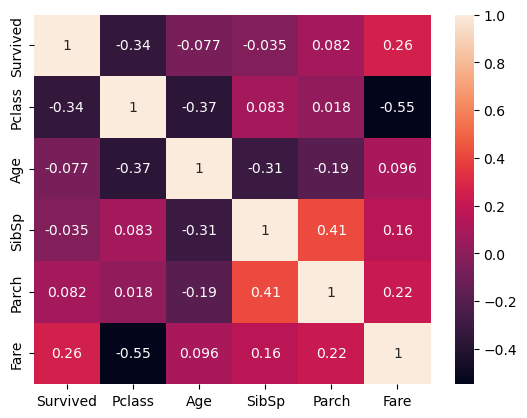

In [16]:
import seaborn as sn
corr=train.corr()
sn.heatmap(corr,annot=True)
print("From the graph, we can infer that there is a strong relation between Survived people and the fare they paid")

### Find the number of passengers who were married

In [17]:
import re
cnt=0
for i in train['Name']:
    if(re.findall("Mrs", i)):
        cnt=cnt+1
print("The Number of married couples were:",cnt)

The Number of married couples were: 129


## Classification : (Optional)

### Split the training set into training and validation partitions in the ratio of 75% : 25% and train a linear classification model on the randomly shuffled training partition. Evaluate on the validation set. Make predictions on the test set.

In [18]:
splitTrain = train.sample(frac=.75,random_state=42)
splitTrain

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,15.2458
439,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,10.5000
840,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,7.9250
720,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,33.0000
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417
...,...,...,...,...,...,...,...,...
689,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375
810,0,3,"Alexander, Mr. William",male,26.0,0,0,7.8875
219,0,2,"Harris, Mr. Walter",male,30.0,0,0,10.5000
641,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,69.3000


In [19]:
trainTemp = train.drop(splitTrain.index)
validation = trainTemp.sample(frac=.25,random_state=42)
len(validation)

56

In [20]:
splitTrain_part = splitTrain[['Pclass','SibSp','Parch']]
splitTrain_part

,Pclass,SibSp,Parch
709,3,1,1
439,2,0,0
840,3,0,0
720,2,0,1
39,3,1,0
...,...,...,...
689,1,0,1
810,3,0,0
219,2,0,0
641,1,0,0


In [21]:
model = LinearRegression()

In [22]:
model.fit(splitTrain_part,splitTrain['Survived'])

LinearRegression()

In [23]:
test_predict = model.predict(test[['Pclass','SibSp','Parch']])
# df2 = pd.DataFrame(data=test_predict,columns=["Predicted Rent"])
# df2
# print(test_predict)

In [24]:
# mae = mean_absolute_error(test['Survived'],test_predict)
# mae

In [25]:
# mse = mean_squared_error(test['Survived'],test_predict)
# mse

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
# rmse = np.sqrt(mse)
# rmse

In [28]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [29]:
train = train.drop(['Name','Sex','Age'],axis=1)

In [30]:
X= train.drop('Survived',axis=1)
y= train['Survived'] #trying to predict


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
modelL = LogisticRegression()

In [33]:
X_test

,Pclass,SibSp,Parch,Fare
709,3,1,1,15.2458
439,2,0,0,10.5000
840,3,0,0,7.9250
720,2,0,1,33.0000
39,3,1,0,11.2417
...,...,...,...,...
715,3,0,0,7.6500
525,3,0,0,7.7500
381,3,0,2,15.7417
140,3,0,2,15.2458


In [34]:
modelL.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions = modelL.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       175
           1       0.69      0.51      0.59       120

    accuracy                           0.71       295
   macro avg       0.70      0.68      0.68       295
weighted avg       0.71      0.71      0.70       295



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[148,  27],
       [ 59,  61]], dtype=int64)